Task list 11 (for submission) - part 1
======================================

Submission
----------

The solution should be submitted **jointly with part 2** - the deadlines for the submission are Monday 5th June (for the Wednesday groups) and Saturday, 24th June (for the Friday group).

Introduction
---------------

Your task is to implement the [Schelling's model of segregation](https://en.wikipedia.org/wiki/Schelling%27s_model_of_segregation). This part focuses on the implementation of the model itself, the second part will be focused around analyzing the model's output (**the second part of the task will be published after a week**).

The model describes a behavior of two groups (later indicated by numbers 1 and 2 in the array - number 0 will be a vacant space) of people that can move on a square lattice - they only want to move when their satisfaction with the neighbors is below a given threshold. The satisfaction is computed as number of neighbors that belong to the same group as the agent (a cell's neighborhood consists of all 8 cells that share an edge or a corner with it) divided by the total number of neighbors (in other words, a vacant cell in the neighborhood does not influence the decision of the agent).

In the model, all agents determine if they want to move somewhere else at the same time. However, their moving is sequential (they move one by one, in a random order, and their new place is chosen randomly from the vacant cells).

**in this task, do not import additional modules, packages or functions**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from time import time, sleep

As a first step, we will define the parameters of the model.

In [2]:
# parameters
N = 100
t = .5
E = .03

*Task 1* implement of the function `initialize(N, E)` - `N` is the size of the lattice (the lattice is `NxN`), and `E` is the fraction of vacant spaces.

After the values are initialized, add a rows/columns of zeros around the matrix, so that the final matrix is of size `(N+2)x(N+2)` and the first row, the last row, the first column and the last column are zero (with the middle `NxN` lattice being the "world" that the agents inhibit).

Make sure that the number of agents in each group is equal and the agents are placed randomly.

**The function `mid` will be helpful in the later steps (it extracts the "world")**

In [3]:
def initialize(N, E):
    # Calculate the number of agents in each group
    num_agents = int((N * N) * (1 - E) / 2)

    # Randomly assign agents to the first group (1) and second group (2)
    e = N * N - 2 * num_agents
    ones_list = [1] * num_agents
    two_list = [2] * num_agents
    zeros_list = [0] * e
    agents_ = ones_list + two_list + zeros_list
    np.random.shuffle(agents_)
    agents = np.array(agents_).reshape(N, N)
    zeros_matrix = np.zeros((N+2, N+2))
    zeros_matrix[1:-1, 1:-1] = agents

    return zeros_matrix


def mid(a):
    return a[1:-1, 1:-1]

**Use the cell below to check the correctness of your implementation**

Note, that this only checks the number of agents, not their random placement.

> `assert` will raise an Exception when the condition is not met, otherwise (if the tested condition is met) the cell will execute without an error.

> **!!!** do not change the contents of the cells that have `assert` clause - they are written to help you check that your implementation is correct and runs quick enough for the later tasks

In [4]:
assert(mid(initialize(10, .4)).sum() == 90)
assert(mid(initialize(9, .4)).sum() == 72)
# aside from the correctness, we will measure the performance of the code, the following code should execute in less than 5 seconds (on any computer)
ts = time()
for n in range(5, 100):
    for e in [.01, .05, .1, .2]:
        _ = initialize(n, e)
time_taken = time() - ts
print(f'Done in {time_taken} seconds')
assert(time_taken < 5)

Done in 0.11227989196777344 seconds


*Task 2* implement the `return_unhappy` function that returns a list of tuples with positions (row, column) of the agents that are unhappy with their current neighborhood.

In this and later tasks, assume that the whole state (i.e., an array with world padded with zeros) is stored in variable called `state`. Remember, that a vacant cell has no agent - therefore it can't be unhappy.

In [5]:
def return_unhappy(t, N):
    
    unhappy_agents = []
    
    # Iterate over each agent
    for i in range(1, N + 1):
        for j in range(1, N + 1):
            agent = state[i, j]
            
            g = agent
            
            if g == 1 or g == 2:
            
                b = state[i-1:i+2, j-1:j+2]
                b = b.copy()
                b[1,1] = 0
                sum_ = np.sum(b==g)

                all_neighbors = np.sum(b!=0)
                
                if all_neighbors != 0:
                    same_group_neighbors = sum_ / all_neighbors
                    if same_group_neighbors < t:
                        unhappy_agents.append((i, j))
    
    return unhappy_agents

Check your implementation below - it needs to be both correct and performant.

In [6]:
state = np.array([[0, 0, 0, 0, 0], [0, 2, 1, 2, 0], [0, 1, 1, 0, 0], [0, 2, 1, 0, 0], [0, 0, 0, 0, 0]])
print(state)
a = set(return_unhappy(0.55, 3))
print(a)
assert(set(return_unhappy(0.55, 3)) == set([(1, 1), (1, 3), (1, 2), (2, 2), (3, 1)]))
ts = time()
state = np.array([[0, 0, 0, 0, 0, 0, 0], [0, 2, 2, 1, 2, 1, 0], [0, 2, 1, 1, 0, 1, 0], [0, 1, 2, 2, 1, 0, 0], [0, 0, 1, 2, 1, 0, 0], [0, 2, 1, 0, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0]])
for _ in range(100):
    for tt in [.2, .3, .4, .5, .6, .7, .8]:
        _ = return_unhappy(tt, 5)
time_taken = time() - ts
print(f'Done in {time_taken} seconds')
assert(time_taken < 10)

[[0 0 0 0 0]
 [0 2 1 2 0]
 [0 1 1 0 0]
 [0 2 1 0 0]
 [0 0 0 0 0]]
{(1, 2), (3, 1), (1, 1), (2, 2), (1, 3)}
Done in 0.17955636978149414 seconds


*Task 3* implement the `get_vacant` function that returns a list of tuples with positions (row, column) of the vacant cells in the "world" (do not count the zeros on the border of the `state` array - no agent can move there!).

In [7]:
def get_vacant(N):
    vacant = []
    # Iterate over each cell in the inner part of the state array
    for i in range(1, N+1):
        for j in range(1, N+1):
            if state[i, j] == 0:
                vacant.append((i, j))
    return vacant

Check your implementation below.

In [8]:
state = np.array([[0, 0, 0, 0, 0, 0, 0], [0, 2, 2, 1, 2, 1, 0], [0, 2, 1, 1, 0, 1, 0], [0, 1, 2, 2, 1, 0, 0], [0, 0, 1, 2, 1, 0, 0], [0, 2, 1, 0, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0]])
print(get_vacant(5))
assert(set(get_vacant(5)) == set([(2, 4), (3, 5), (4, 1), (4, 5), (5, 3), (5, 5)]))
ts = time()
for _ in range(10000):
    _ = get_vacant(5)
time_taken = time() - ts
print(f'Done in {time_taken} seconds')
assert(time_taken < 2)

[(2, 4), (3, 5), (4, 1), (4, 5), (5, 3), (5, 5)]
Done in 0.05633187294006348 seconds


*Task 4* implement the `move` function that modifies the array - given a  list of tuples with positions (row, column) of the unhappy neighbors. For each unhappy agent, move it to a vanact position (**note: the agents need to be moved in a random order, otherwise the implementation is incorrect**)

In [9]:
def move(unhappy, N):
    # the function should modify the state array and return nothing
    # Iterate over the unhappy agents in random order
    np.random.shuffle(unhappy)
    
    for agent_pos in unhappy:
        agent_row, agent_col = agent_pos
        
        # Get the vacant positions
        vacant = get_vacant(N)
        
        # Randomly select a vacant position
        new_pos = np.random.choice(len(vacant))
        new_row, new_col = vacant[new_pos]
        
        # Move the agent to the vacant position
        state[new_row, new_col] = state[agent_row, agent_col]
        state[agent_row, agent_col] = 0

In [10]:
ts = time()
for _ in range(200):
    state = np.array([[0, 0, 0, 0, 0, 0, 0], [0, 2, 2, 1, 2, 1, 0], [0, 2, 1, 1, 0, 1, 0], [0, 1, 2, 2, 1, 0, 0], [0, 0, 1, 2, 1, 0, 0], [0, 2, 1, 0, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0]])
    unh = return_unhappy(0.55, 5)
    move(unh, 5)
time_taken = time() - ts
print(f'Done in {time_taken} seconds')
assert(time_taken < 3)

Done in 0.11122322082519531 seconds


**Use the cells below to run the simulation and see if the output looks correct**

In [11]:
# SIMULATE
state = initialize(N, E)
done = False
frames = min(N**2, 100)  # Define the maximum number of iterations, limited by the size of the lattice

def update(frame):
    global done
    if done:
        return
    unh = return_unhappy(t, N)
    if not unh:
        done = True
        print('Finished')
        return
    print(f'start of iteration {frame}, #unhappy: {len(unh)}')
    move(unh, N)
    if frame >= frames:
        print('Not finished')
    im.set_data(mid(state))
    plt.title(f'Iteration: {frame}, Unhappy: {len(unh)}')

start of iteration 0, #unhappy: 3796
start of iteration 0, #unhappy: 2077
start of iteration 1, #unhappy: 1287
start of iteration 2, #unhappy: 853
start of iteration 3, #unhappy: 597
start of iteration 4, #unhappy: 429
start of iteration 5, #unhappy: 332
start of iteration 6, #unhappy: 267
start of iteration 7, #unhappy: 197
start of iteration 8, #unhappy: 155
start of iteration 9, #unhappy: 121
start of iteration 10, #unhappy: 85
start of iteration 11, #unhappy: 66
start of iteration 12, #unhappy: 63
start of iteration 13, #unhappy: 50
start of iteration 14, #unhappy: 47
start of iteration 15, #unhappy: 29
start of iteration 16, #unhappy: 16
start of iteration 17, #unhappy: 16
start of iteration 18, #unhappy: 14
start of iteration 19, #unhappy: 8
start of iteration 20, #unhappy: 6
start of iteration 21, #unhappy: 6
start of iteration 22, #unhappy: 3
start of iteration 23, #unhappy: 3
start of iteration 24, #unhappy: 4
start of iteration 25, #unhappy: 5
start of iteration 26, #unhappy:

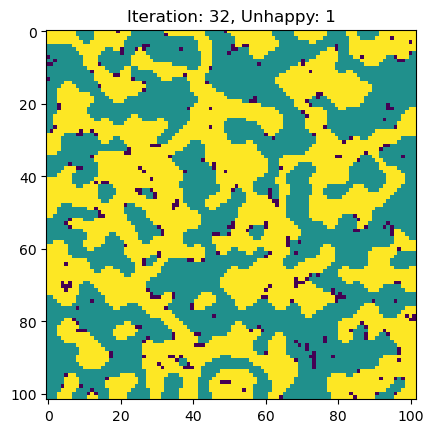

In [15]:
%%time
fig = plt.figure()
im = plt.imshow(state)
ani = animation.FuncAnimation(fig=fig, func=update, frames=frames, interval=50, repeat=False)
result = 'save'
if result == 'show':
    plt.show()
else:
    # optionally, save, for example as html
    ani.save(filename='schelling.html', writer='html')